## Instructions
- See deadline on the course web page
- This problem set is performed individually. See examination rules on the course web page.
- Students are allowed to discuss together and help each other when solving the problems. However, every student must understand and be able to explain his/her submitted solution. Plagiarism is not allowed (submissions will be both manually and automatically monitored).
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on.
- Many problems are automatically graded using `assert` statements. You should check that your code passes these statements without raising an `AssertionError`. Note that there might be additional, hidden tests that must be passed for full credit. In addition, some tasks are either completely manually graded or part-automatic/part-manual.
- Note that grading is performed in the teacher's python environment, which is based on the conda `environment.yml` file in the course github repo. Please avoid using additional python modules (such as `plotly`) as this might cause automatic tests to fail.

- **Important:** Hand-in is performed through the following actions:
  - Make sure to always complete **Task 0** in the header part of the notebook and that this part does not raise any `AssertionError`(s). 
  - Upload your solution in the form of your edited version of this jupyter notebook via the appropriate module in Canvas.
  - The name of the uploaded file **must be the same as the original one**!
  
  Note that the hand-in might not be automatically graded if you have changed the name of the uploaded file.

- Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

- Make sure that the **run time is smaller than a few minutes**. If needed you might have to reduce some computational tasks; e.g. by decreasing the number of grid points or sampling steps. Please ask the supervisors if you are uncertain about the run time. 

- Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)
Fill your personal details in the dictionary 'student' with the following key/value pairs:
- **Lastname**: Your lastname as a string
- **Firstname**: Your firstname as a string
- **DOB-year**: The year for your date of birth as a four-digit integer
- **DOB-month**: The month for your date of birth as an integer (1-12)
- **DOB-day**: The year for your date of birth as an integer (1-31)
- **CID**: Your Chalmers login ID as a string

In [1]:
student={}
# Update the values below. Note the formats.
student['Lastname']='Olsson'  # string
student['Firstname']='Gottfrid' # string
student['CID']='gotols'        # string
student['DOB-year']=2000         # four-digit integer
student['DOB-month']=5          # integer in the range [1, 12]
student['DOB-day']=4             # integer in the range [1, 31]

In [2]:
for key in ['Lastname', 'Firstname','CID']:
    assert type(student[key]) is str, f'{key} is wrong type.'
    assert student[key] not in ['name_here','cid_here'],\
        f'Fill your {key} as a string.'

for key in ['DOB-year', 'DOB-month','DOB-day']:
    assert type(student[key]) is int, f'{key} is wrong type.'

assert (student['DOB-year'] > 1900 and student['DOB-year'] < 2100)
assert student['DOB-month'] in range(1,13), \
    'DOB month should be an integer in the range [1, 12]'
assert student['DOB-day'] in range(1,32), \
    'DOB day should be an integer in the range [1, 31]'

By changing the below boolean variable `student_self_assessment` to `True` you attest that:
1. All handed in solutions were produced by yourself in the sense that you understand your solutions and should be able to explain and discuss them with a peer or with a teacher.
2. That discussions with your peers are allowed, also concerning approaches to solve the problem sets, but that direct plagiarism is not allowed and that you must reach your own understanding of submitted solutions according to the definition in the previous point.

In [3]:
student_self_assessment = True

# YOUR CODE HERE

In [4]:
assert student_self_assessment == True, 'You must assert the individual solution statements.'

# Problem Set 3
## Extra problems
### Learning from data [TIF285], Chalmers, Fall 2022

Last revised: 26-Sep-2022 by Christian Forssén [christian.forssen@chalmers.se]

In [5]:
import os
# Data files are stored in
DATA_DIR = "DataFiles/"

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

## Problem 5 (extra): Bayesian optimization
### (3 points)
*You should have solved problem 3 to get some acquaintance with Gaussian Processes before doing this problem.*

In [6]:
# Import modules
#
%matplotlib inline
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import GPy
import scipy.stats

# Additional module import statements if needed

### A univariate minimization problem

Try to minimize the function
$$
f(x) = \sin(6 x) + 0.2 x^2 - 0.7 x
$$
on the interval $x \in [-5,5]$.

The aim is to find the position of the minimum $x^*$ to within $\pm 0.05$ under the constraint that we would like to make as few function evaluations as possible.

### Task 1: Using "standard" optimization methods

a. **Plot the true function and indicate the position of the minimum**
Save the position of the *global* minimum in the variable `xtrue_min` (with at least two significant decimals)

true minima: (1.832, -1.611)


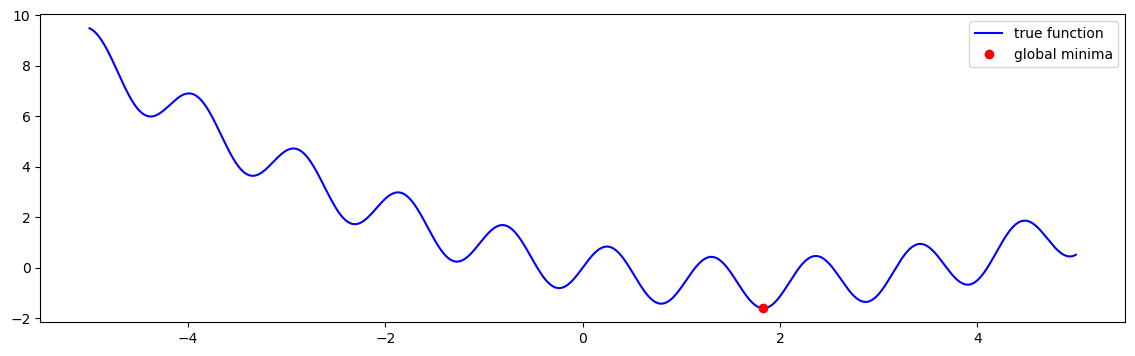

In [7]:
xmin =  -5.
xmax =  5.
X_domain_fix = np.linspace(xmin,xmax,10000)
X_domain_fix_small = np.linspace(xmin,xmax,1000)

def true_function(x):
    return np.sin(6*x) + 0.2*x**2 - 0.7*x

y_true = true_function(X_domain_fix)

ytrue_min = min(y_true)
xtrue_min_index = np.where(y_true == ytrue_min)
xtrue_min = X_domain_fix[xtrue_min_index][0]

fig, ax = plt.subplots(figsize=(14,4))

ax.plot(X_domain_fix, y_true, 'b', label='true function')
ax.plot(xtrue_min, ytrue_min, marker='o', color='r', linestyle='', label='global minima')
ax.legend()

print(f"true minima: ({xtrue_min:.3f}, {ytrue_min:.3f})")

b. Find the minimum using `scipy.optimize.minimize` with `method='Nelder-Mead'`. 
* Choose the starting point randomly from a uniform pdf $U(-5,5)$. 
* Repeat one hundred times. **Do you always get the same minimum?**
* More specifically, set the tolerance of the optimizer to `tol=0.01` and check for success by the criterion $|x^* - x^*_\mathrm{opt}| < 0.05$, where $x^*_\mathrm{opt}$ is the result from the optimizer.
* Be quantitative about the average number of function evaluations that are needed per successful optimization. Compute the ratio of the total number of function evaluations number (summed over the 100 tries with different starting points) with the number of successful attempts.  
  *Hint*: The number of function evaluations from a `scipy.optimize.minimize` result is returned in the ``OptimizeResult`` object. 

Sum of function evaluations (1355) divided by the number of succesful optimization attemts (6): 225.83
Long term ratio (ratio for 50 optimization runs with 100 optimizations each): 156.993379


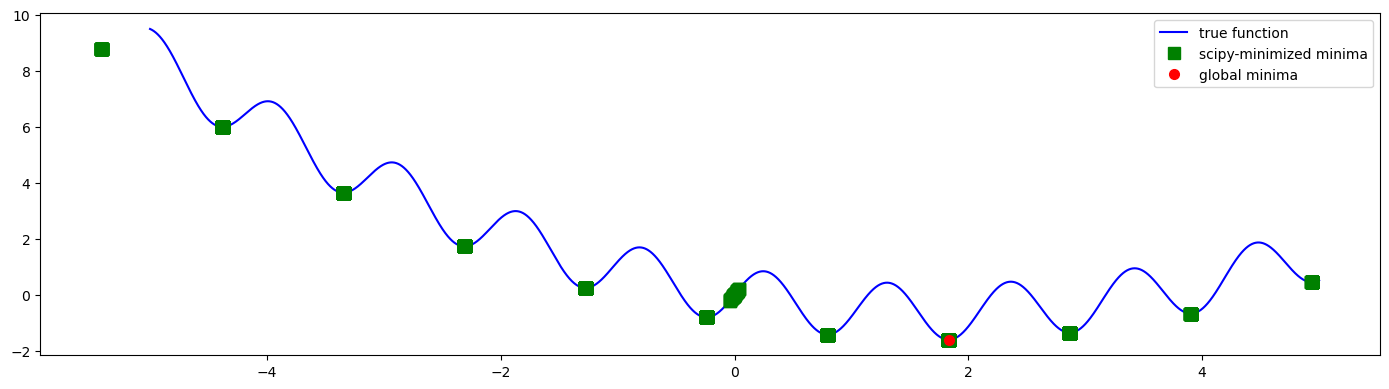

In [8]:
# INITATE VARIBLES #
x_opt_stars= []
num_opt_loops, num_runs = 100, 50
ratios = []

for k in range(num_runs):
    num_fevals = []
    successful_attempts = 0
    
    for i in range(num_opt_loops):

        x_0 = scipy.stats.uniform.rvs(loc=-5, scale=10, size=1) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html?highlight=uniform 
        opt_result = scipy.optimize.minimize(true_function, x_0, method='Nelder-Mead', tol=0.01) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
        x_star_i = opt_result.x

        if np.abs(x_star_i - xtrue_min) < 0.05:
            successful_attempts += 1 

        x_opt_stars.append(x_star_i)
        num_fevals.append(opt_result.nfev)

    nfevals_per_success =  np.sum(num_fevals) / successful_attempts
    ratios.append(nfevals_per_success)

long_term_ratio = np.average(ratios)


# PLOT # 
x_opt_stars = np.array(x_opt_stars)
y_opt_stars = true_function(x_opt_stars)

fig, ax = plt.subplots(figsize=(14,4))

ax.plot(X_domain_fix, y_true, 'b', label='true function')
ax.plot(x_opt_stars, y_opt_stars, marker='s', color='g', markersize='8', linestyle='', label='scipy-minimized minima')
ax.plot(xtrue_min, ytrue_min, marker='o', color='r', linestyle='', markersize='7', label='global minima')
ax.legend()
fig.tight_layout();

# PRINT #
print(f'Sum of function evaluations ({np.sum(num_fevals)}) divided by the number of succesful optimization attemts ({successful_attempts}): {nfevals_per_success:.2f}')
print(f'Long term ratio (ratio for {num_runs} optimization runs with {num_opt_loops} optimizations each): {long_term_ratio:2f}')

### Task 2. Build your own BayesOpt algorithm

You will now implement a very different approach to minimize an objective function (this is a conventional name for the function that we are trying to minimize or maximize). The approach is known as **Bayesian optimization** and the basic idea is the following:
* Select a few random points, evaluate the unknown function at these samples and build a **statistical model** for the function output in the entire input range based on this data (usually a Gaussian Process model).
* Make a decision which point to sample next based on a so called **acquisition function** evaluated from the statistical model. This decision will incorporate our current knowledge about the function including our uncertainty for its value in different regions.
* Improve the statistical model using the new sample. Continue sampling new points according to the acquisition function.
* If done correctly, this approach will balance **exploration** of new regions (with uncertain outputs, that might contain the minimum) and **exploitation** of the region that is currently most promising.
* Very importantly, this method also works when you are dealing with **noisy objective functions**, i.e. when your "measurement" of its value at a new point in parameter space contains some random noise.

Your task is to repeat the above minimization with **your own Bayesian Optimization algorithm**, that should be assembled as described below. Bayesian optimization algoritms are built into libraries such as `Scikit-optimize` and `GPyOpt`, but we will build our own simple version using functions from `numpy`, `scipy`, and `GPy` (for building the statistical model).

The pseudo-code for BayesOpt is the following (see specific hints for your implementation at the end):
1. pick starting points $\mathbf{x}^{(1)},\mathbf{x}^{(2)},\ldots \mathbf{x}^{(k)}$, where $k \geq 2$
1. evaluate the objective function $f(\mathbf{x})$ to obtain $y^{(i)}=f(\mathbf{x}^{(i)})$ for $i=1,\ldots,k$
1. initialize a data vector $\mathcal{D}_k = \left\{(\mathbf{x}^{(i)},y^{(i)})\right\}_{i=1}^k$
1. select a statistical model for $f(\mathbf{x})$
1. **For** {$n=k+1,k+2,\ldots$}
   1.    select $\mathbf{x}^{(n)}$ by optimizing the acquisition function: $\mathbf{x}^{(n)} = \underset{\mathbf{x}}{\text{arg max}}\, \mathcal{A}(\mathbf{x}|\mathcal{D}_{n-1})$
   1.    evaluate the objective function to obtain $y^{(n)}=f(\mathbf{x}^{(n)})$
   1.    augment the data vector $\mathcal{D}_n = \left\{\mathcal{D}_{n-1} , (\mathbf{x}^{(n)},y^{(n)})\right\}$
   1.    update the statistical model for $f(\mathbf{x})$
1. **end for**

   Check for the minimum in the data vector that has been collected (note that it doesn't necessarily have to be the last sample).


**Hints:**
* You have to implement all steps in the above pseudo-code.
* You can try with $k=2$ starting points.
* For the statistical model you can use `GPy`. Follow the examples from the lectures and the exercise notebook.
* Any knowledge about the objective function should be built into the covariance function. Let us assume that we don't have much information and that we use a standard RBF kernel.
* It is recommended to constrain the RBF lengthscale so that it doesn't become unrealistic small. With the `GPy` model called `model`, such a constraint can be imposed using `model['rbf.lengthscale'].constrain_bounded(.1,10)`.
* Implement the so called Lower Confidence Bound (LCB) acquisition function for use in step 5A. Then, the acquisition function is simply: $\mathcal{A}(\boldsymbol{x}; | \mathcal{D}_{n-1}) = -\mu(\boldsymbol{x}) + \beta \sigma(\boldsymbol{x})$, where
  * $\mu(\boldsymbol{x})$ is the mean of the GP model trained with the data $\mathcal{D}_{n-1})$.
  * $\sigma(\boldsymbol{x})$ is the standard deviation of the GP model trained with the data $\mathcal{D}_{n-1})$.
  * $\beta$ is another hyperparameter for tuning the preference for exploring unknown regions. You can set $\beta = 2$.
* Remember that the statistical model has to be updated (the hyperparameters re-optimized) at step 5D.

#### Tasks
* Implement the BayesOpt minimizer
* Assume that you are allowed a total of 100 function evaluations ($k$ of them for the starting points and $100-k$ in the loop). Are you able to find the minimum to within $\pm 0.05$?
* Plot the final statistical model together with the true function. Show which points that have been explored.
* Plot also the convergence of the minimum value $\min(y_n)$ as a function of the iteration number $n \in \{1, \ldots, 100\}$.

In [9]:
# Initialize the Bayesian Optimization by performing steps 1-4.
np.random.seed(1) # You might want to try with different seeds.


## 1. PICK k STARTING POINTS ##
k = 2
X_domain_fix = np.reshape(X_domain_fix, (-1,))
x = np.random.choice(X_domain_fix, size=k)
x = np.reshape(x, (-1,1)) #to please GPy.model.GPRegression


## 2. EVALUATE OBJECTIVE FUNCTION ##
y = true_function(x)
y = np.reshape(y, (k,1)) #to please GPy.model.GPRegression

    
## 3. INITIALIZE DATA VECTOR ##
data = np.hstack((x, y))


## 4. STATISTICAL GP-MODEL FOR OBJECTIVE FUNCTION ##
kernel   = GPy.kern.RBF(1)                           
GP_model = GPy.models.GPRegression(x, y, kernel)
GP_model['rbf.lengthscale'].constrain_bounded(.1,10)


##  Lower Confidence Bound (LCB) acquisition function for use in step 5A. ##    
def LCB_acquisition_function(GP_model_mean, GP_model_sigma, beta=2):
    
    return -GP_model_mean + beta * GP_model_sigma


reconstraining parameters GP_regression.rbf.lengthscale


In [10]:
# Perform the loop, i.e. repeat steps 5A-D 100-k times
N = 100-k
n_points = 1000
xrange = xmax - xmin
dx = xrange/n_points

for n in range(N):
    # For better performance of the BayesOptimizer it is desirable to shift the grid in each iteration
    X_domain = np.linspace(xmin+dx*np.random.uniform(), xmax, n_points).reshape(-1,1)
    
    
    ## A. SELECT x^(n) BY OPTIMIZING THE ACUISITION FUNCTION ##
    # x^(n) = arg max (x) acquasition_function(x|data_nMinusOne)
    
    # calculate acquasition function LCB() for the "grid" X_domain = LCB_grid_eval
    GP_model_mean, covariance = GP_model.predict(X_domain)#, full_cov=True) #reshape x to an array 
    GP_model_sigma = np.sqrt(abs(covariance)) #abs bcs. GP_model.predict gives negative covariance sometimes
    LCB_grid_eval = LCB_acquisition_function(GP_model_mean, GP_model_sigma, beta=2)
    
    # get x_n such that LCB(x_n) = max(maximum value of LCB)
    max_index = np.where(LCB_grid_eval == np.max(LCB_grid_eval))
    x_n_all = X_domain[max_index]
    if len(x_n_all) > 1:
        x_n = x_n_all[0] #they are all the same if we found the max value
    else:
        x_n = x_n_all
    
    x_n = np.array(x_n)
    

    ## B. EVALUATE OBJECTIVE FUNCTION ##
    y_n = true_function(x_n)


    ## C. ADD NEW DATA TO THE DATA VECTOR ##
    new_data = np.array((x_n, y_n))
    new_data = np.reshape(new_data, (1, -1))
    data = np.vstack((data, new_data))
    
    
    ## D. UPDATE THE GP-MODEL FOR OBJECTIVE FUNCTION ##
    x, y = data[:,0], data[:,1]
    x = np.reshape(x, (-1,1)) #to please GPy.model.GPRegression
    y = np.reshape(y, (-1,1)) #to please GPy.model.GPRegression
    GP_model = GPy.models.GPRegression(x, y, kernel)
    m = GP_model.optimize()

    
print(f"Done: ran through {N} iterations")

Done: ran through 98 iterations


x_min_BayesOpt, y_min_BayesOpt = (1.830, -1.611)
x_min_true, y_min_true = (1.832, -1.611)

Name : GP regression
Objective : -25.60847526752307
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |      5.145452294277232  |      +ve      |        
  rbf.lengthscale          |    0.10000000013989094  |   0.1,10.0    |        
  Gaussian_noise.variance  |  4.300961232264863e-16  |      +ve      |        


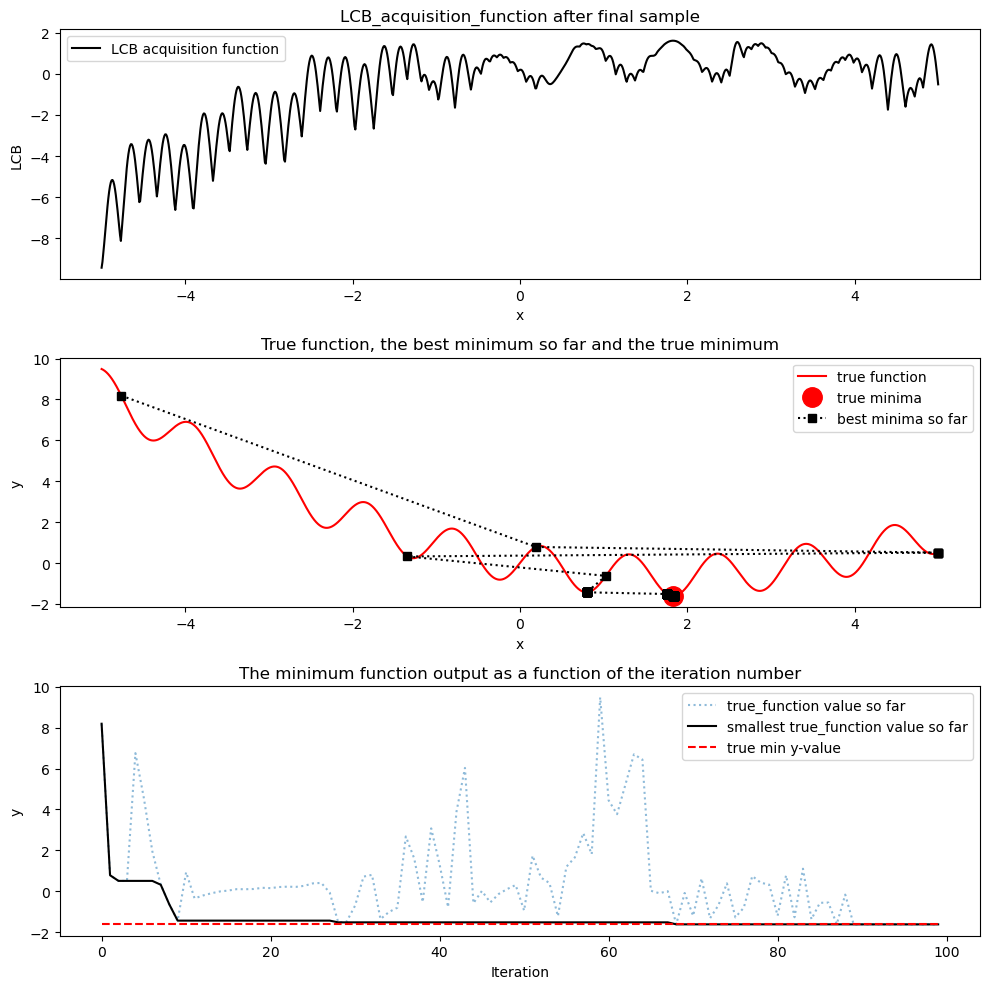

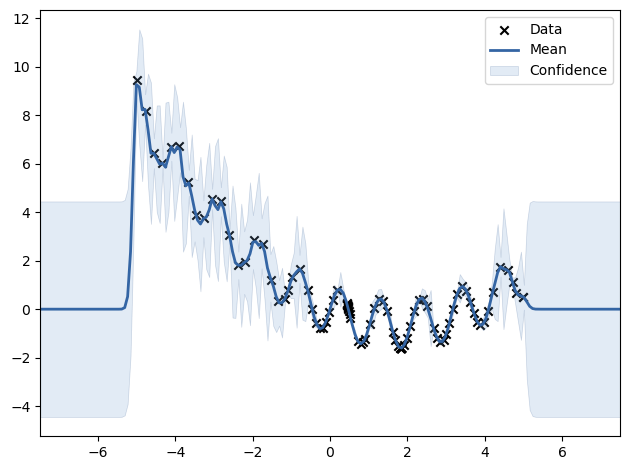

In [11]:
## CHECK MINIMUM y-value IN THE DATA VECTOR ##
x_BayesOpt, y_BayesOpt = data[:,0], data[:,1]
y_min_BayesOpt =  np.min(y_BayesOpt)
x_min_index = np.where(y_BayesOpt == y_min_BayesOpt)
x_min_BayesOpt = x_BayesOpt[x_min_index][0]

print(f"x_min_BayesOpt, y_min_BayesOpt = ({x_min_BayesOpt:.3f}, {y_min_BayesOpt:.3f})")
print(f"x_min_true, y_min_true = ({xtrue_min:.3f}, {ytrue_min:.3f})")


fig, axs = plt.subplots(3, figsize=(10,10))

## 1. GP MODEL AFTER FINAL SAMPLE ##
print(GP_model)
GP_model.plot()


## 2. ACQUASITION FUNCTION AFTER FINAL SAMPLE ##
axs[0].plot(X_domain_fix_small, LCB_acquisition_function(GP_model_mean, GP_model_sigma, beta=2), 'k', label='LCB acquisition function')
axs[0].set_xlabel("x")
axs[0].set_ylabel("LCB")
axs[0].set_title("LCB_acquisition_function after final sample")
axs[0].legend()


## 3. BEST MINIMUM THUS FAR AS FUNCTION OF ITERATION NUMBER & COMPARED TO TRUE MINIMA ##
x_best_min_so_far, y_best_min_so_far, y_function_value_so_far, y_function_values = [], [], [], []
iteration_numbers = np.arange(0,100)

for i in range(100):
    x_i, y_i = x_BayesOpt[i], y_BayesOpt[i]
    if i == 0:
        x_best_min_so_far.append(x_i)
        y_best_min_so_far.append(y_i)
        y_function_value_so_far.append(true_function(x_i))
        
    else: 
        if abs(y_i - ytrue_min) < abs(y_best_min_so_far[i-1] - ytrue_min): #i.e. the new value is closer to the true min (in y-direction) than the old value
            x_best_min_so_far.append(x_i)
            y_best_min_so_far.append(y_i)
            y_function_value_so_far.append(true_function(x_i))
        else:
            x_best_min_so_far.append( x_best_min_so_far[i-1] )
            y_best_min_so_far.append( y_best_min_so_far[i-1] )
            y_function_value_so_far.append(true_function(x_best_min_so_far[i-1]))
    y_function_values.append(true_function(x_i))

axs[1].plot(X_domain_fix, y_true, 'r', label='true function')
axs[1].plot(xtrue_min, ytrue_min, 'r', marker='o', markersize=14, linestyle='', label='true minima')
axs[1].plot(x_best_min_so_far, y_best_min_so_far, marker='s', linestyle=':', color='k', label="best minima so far")

axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].set_title("True function, the best minimum so far and the true minimum")
axs[1].legend()


# another way of plotting 3.
axs[2].plot(iteration_numbers, y_function_values, linestyle=':', alpha=0.5, label='true_function value so far')
axs[2].plot(iteration_numbers, y_function_value_so_far, linestyle='-', color='k', label='smallest true_function value so far')
axs[2].plot(iteration_numbers, np.ones_like(iteration_numbers)*ytrue_min, linestyle='--', color='r', label='true min y-value')
axs[2].set_xlabel("Iteration")
axs[2].set_ylabel("y")
axs[2].set_title("The minimum function output as a function of the iteration number")
axs[2].legend()

fig.tight_layout();

## RESULTS:
    x_min_BayesOpt, y_min_BayesOpt = (1.830, -1.611)
            x_min_true, y_min_true = (1.832, -1.611)
            
    --> algorithm found the minima within 0.002 for the x-value and less than 0.001 for the y-value - good!
    
    The first plot (LCB): where the LCB is large, we want to sample a point. I.e. regions where we explore or exploit.
                          Comparing it the the plot underneath, we see that the LCB is large at the true minima of the 
                          function (x = 1.83) and the troughs close to it - which makes sense because after we have
                          explored the points in the loop (100-k), we are know that those troughs are good places to look
                          for the true minima.
    
    Second plot: shows the path taken for the BayesOpt-algorithm down to the true, the best minima so far. This is just to
                 visualize what is "happening" with the algorithm.
    
     Third plot: shows the output of the true function for each iteration of the algorithm, together with the best output
                 compared to the true minima. In this case (with this random-state) the best-so-far drops quite fast, 
                 and is a good approximation at 10 iterations. Around 65-70 iterations, it's very close to the true minima.
                
    Fourth plot: the GP_model with 95% confidence and the explored points of the BayesOpt algorithm. 

## Problem 6 (extra): A simple Bayesian binary classifier
### (4 points)
*You should have solved problem 4 before doing this problem.*

In [12]:
# Import modules

%matplotlib inline
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

# Additional module import statements if needed
# YOUR CODE HERE

Create a bayesian binary classifier that can take $(E,|m|)$ as input data and predicts a binary label (0=below $T_c$, 1=above $T_c$). 
* Use only high- and low-tempterature data for training (so that predictions for intermediate temperature data should be more difficult). Use normalized data as in Task 4.
* The weights (and bias) of the single neuron binary classifier will be described by pdf:s that we will sample from using MCMC.
* Use a Gaussian prior on the two weights and the bias (with ``weight decay'' $\sigma = 1.0)$.
* Construct the (log) likelihood as in logistic regression (i.e. as used in Task 1). 
* Use, e.g., `emcee`, for the MCMC sampling.
* The prediction for a given input should be characterized by a pdf; i.e. the predicted probability for the state belonging to class 1 (above $T_c$) will itself be described by a pdf.

#### Sub-tasks
(a) Set up the training data

(b) Train the Bayesian binary classifier and plot the pdf:s for the weights and bias.

(c) Plot the decision boundaries for a few samples of the Bayesian binary classifier. Translate to an average decision boundary.

(d) Study in particular the **prediction** of your Bayesian binary classifier for inputs $(E,|m|)$ that corresponds to:
1. low-temperature configurations.
1. high-temperature configurations.
1. temperatures very close to the critical one.

In [13]:
# Read data
T, Es, Ms = np.loadtxt(f'{DATA_DIR}/problem4_data.dat',unpack=True)

input_data = np.column_stack((Es,Ms))

Tc = 2 / np.log(1+np.sqrt(2))
high_T = T>Tc

# High-temperature = 1
targets = high_T*np.ones_like(T)

**Subtask (a)**: Set up the training data
- Normalize the input data (mean=0, stddev=1)
- Use high- (T>3.5) and low-temperature (T<1.5) data for training. 
- Plot the training data, indicate the target output 1: T>Tc with red symbols and 0: T<Tc with blue symbols.


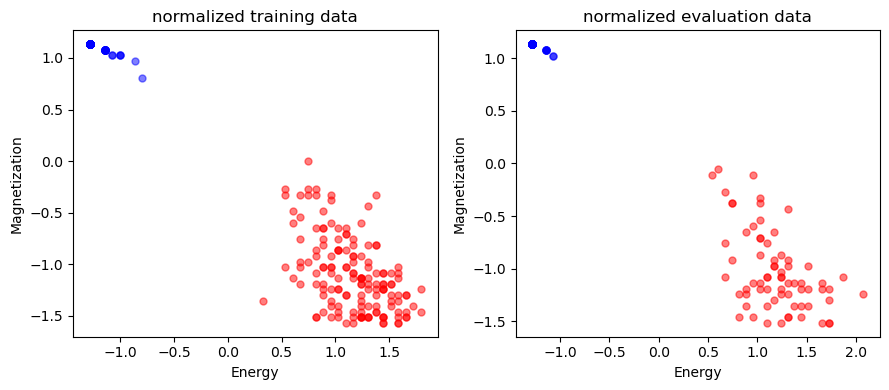

In [14]:
# USING CODE FROM BASIC PROBLEM 4 #
from sklearn.model_selection import train_test_split

# RENAME #
T = T
E = Es
M = Ms

# NORMALIZE ENERGY AND MAGNETIZATION #
E_mean, E_std = np.mean(E), np.std(E)
E = (E - E_mean) / E_std 

M_mean, M_std = np.mean(M), np.std(M)
M = (M - M_mean) / M_std 

# PICK OUT THE TEMPERATURES #
temp_indexes_low  = np.where(T<1.5)[0]
temp_indexes_high = np.where(T>3.5)[0]
temp_indexes = np.concatenate((temp_indexes_low, temp_indexes_high))
T_high_low = T[temp_indexes]
E_high_low = E[temp_indexes]
M_high_low = M[temp_indexes]


# CREATE TARGETS #
t = np.zeros_like(T_high_low)
for i in range(len(t)):
    if T_high_low[i]>Tc:
        t[i] = 1 


# SPLIT DATA #
t_train, t_val, E_train, E_val, M_train, M_val = train_test_split(t, E_high_low, M_high_low, train_size=0.7, random_state=2)


# high T is when target "t" (t_train or t_val) is 1 and low T is when t is 0 <--- this is EXACT solution,
 # when we know where the high and low temperature is
high_T_train_indices = np.where(t_train == 1)
low_T_train_indices  = np.where(t_train == 0)

E_train_high = E_train[high_T_train_indices]
E_train_low  = E_train[low_T_train_indices]
M_train_high = M_train[high_T_train_indices]
M_train_low  = M_train[low_T_train_indices]



high_T_val_indices = np.where(t_val == 1)
low_T_val_indices  = np.where(t_val == 0)

E_val_high = E_val[high_T_val_indices]
E_val_low  = E_val[low_T_val_indices]
M_val_high = M_val[high_T_val_indices]
M_val_low  = M_val[low_T_val_indices]



# PLOT #
fig, axs = plt.subplots(1, 2, figsize=(9,4))

axs[0].set_title("normalized training data")
axs[0].scatter(E_train_high, M_train_high, color='r',alpha=0.5,s=25)
axs[0].scatter(E_train_low, M_train_low, color='b',alpha=0.5,s=25)
axs[0].set_xlabel("Energy")
axs[0].set_ylabel("Magnetization")

axs[1].set_title("normalized evaluation data")
axs[1].scatter(E_val_high, M_val_high, color='r',alpha=0.5,s=25)
axs[1].scatter(E_val_low, M_val_low, color='b',alpha=0.5,s=25)
axs[1].set_xlabel("Energy")
axs[1].set_ylabel("Magnetization")
fig.tight_layout();

In [15]:
# Single neuron classifier code from Problem 4 is probably needed to implement the Bayesian neuron
# copied and modified from PS3, basic problems, Problem 4 [2022-10-13, 16:37]

# Train the single neuron binary classifier
weight_decay_alpha=0.1
eta_learning_rate=0.01

# https://cforssen.gitlab.io/tif285-book/content/MachineLearning/LogReg/LogReg.html?highlight=decay
# decay alpha as:
# alpha*E_W(w) = alpha*(1/2)*sum_j w_j**2   as ridge regularization (keeps parameters from becoming super large)
# calculation done on paper, in the end we should subtract "alpha*w[i]" from the step

def sigmoid(a):
    '''Sigmoid function with input argument a that is the activation'''
    # https://www.digitalocean.com/community/tutorials/sigmoid-activation-function-python
    return 1/(1+np.exp(-a))


def single_neuron(x, w):
    """
    Single neuron prediction.
    
    Single output and N instances of k independent variables.
    
    Args:
        x (array[float]): input (without bias) to the neuron. x.shape=(N,k) 
        w (array[float]): weights, w.shape=(k+1,)
                          The zero index weight is the bias term.
    Returns:
        y (array[float]): the output of the neuron, y.shape=(k+1,)
    """
    z = w[0] * 1 + x @ w[1:] #activation; bias term + x vector product with the vector of w without first element
    y = sigmoid(z)
    
    return y

def SGD(t, x, w, eta, alpha, epochs):
    """
    Stochastic Gradient Descent for binary classification
    
    N instances of k independent variables
    
    Args:
        t (array[float]): targets, t.shape=(N,) 
        x (array[float]): input (without bias), x.shape=(N,k)
        w (array[float]): weights, w.shape=(k+1,)
                          the zero index weight is the bias term.
           alpha (float): hyperparameter, Ridge regularization 
             eta (float): hyperparameter, learning rate
                  eopchs: number of epochs to evaluate the gradient descent

             
    Returns:
       w* (array[float}): optimized weights
    """
    
    for epoch in range(epochs):

        # 1. RANDOMIZE DATA FOR THIS EPOCH
        randomized_indices = np.random.permutation(range(0, len(t)))
        t_randomized = t[randomized_indices]
        x_randomized = x[randomized_indices]
        
        for n in range(len(t_randomized)):
            t_n = t_randomized[n]
            x_n = x_randomized[n]
            y_n = single_neuron(x_n, w)

        
            # 2. COMPUTE ERROR FOR THIS BATCH OF DATA
            e_n = t_n - y_n


            # 3. ADJUST WEIGHTS (step in GD)
            # the addition of "-alpha * w[i]" in the step_n_i comes from ridge regularization (calc. done on paper)
            for i in range(len(w)):
                if i == 0:
                    step_n_i = e_n * 1 - alpha * w[i]  # "x_n[0] = 1" if bias is included (it is not, so we write this explicitly)
                else:
                    step_n_i = e_n * x_n[i-1] - alpha * w[i]
                    
                w[i] += eta * step_n_i
        
        if epoch % 50 == 0:
            print(f"epoch {epoch}:", w)
        
    return w


t_train = np.array(t_train)
t_val = np.array(t_val)

x_train = np.stack([E_train, M_train], axis=1)
x_val   = np.stack([E_val, M_val], axis=1)

k = x_train.shape[1]
w_start = np.zeros((k+1,))

w_star = SGD(t_train, x_train, w_start, eta_learning_rate, weight_decay_alpha, epochs=251) #trained weights for our binary classifier

epoch 0: [ 0.0525896   0.74992645 -0.68484435]
epoch 50: [ 0.09849111  1.05934932 -0.95117433]
epoch 100: [ 0.09872463  1.06060163 -0.95277104]
epoch 150: [ 0.09858255  1.05968465 -0.9523796 ]
epoch 200: [ 0.09968991  1.06088075 -0.95332666]
epoch 250: [ 0.0991816   1.06009695 -0.95216809]


In [16]:
# Define the log prior, likelihood, posterior

#The weights (and bias) of the single neuron binary classifier will be described by pdf:s
# that we will sample from using MCMC.
#Use a Gaussian prior on the two weights and the bias (with ``weight decay'' 𝜎=1.0)
# Construct the (log) likelihood as in logistic regression (i.e. as used in Task 1). 

# source: https://cforssen.gitlab.io/tif285-book/content/MachineLearning/BNN/bnn.html

def log_prior(w, sigma=1.0):
    return -(1/2)*np.sum((w/sigma**2)) #log of gaussian


def log_likelihood(t, x, w):  # equation (35.4) in https://cforssen.gitlab.io/tif285-book/content/MachineLearning/BNN/bnn.html
    C = 0
    
    for n in range(len(t)):
        t_n = t[n]
        y_n = single_neuron(x[n], w)
        
        C += -(t_n*np.log(y_n) + (1-t_n)*np.log(1-y_n)) 

    return -C # = log ( exp(-C_W) )


def log_posterior(t, x, w): # antar att om vi har log prior och log likelihood --> log posterior
    return log_prior(w) + log_posterior(t, x, w)

**Sub-task (b)**: Train the Bayesian binary classifier and plot the pdf:s for the weights and bias.

In [17]:
# YOUR CODE HERE

**Sub-task (c)**: Plot the decision boundaries for a few samples of the Bayesian binary classifier. Translate to an average decision boundary.

In [18]:
# YOUR CODE HERE

**Sub-task (d)**: Study in particular the **prediction** of your Bayesian binary classifier for inputs $(E,|m|)$ that corresponds to:
1. low-temperature configurations.
1. high-temperature configurations.
1. temperatures very close to the critical one.

In [19]:
# YOUR CODE HERE